In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_19.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p1_58.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p2_73.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_7.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p1_15.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_11.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_124.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_34.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p3_74.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p1_19.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p2_84.jpeg
/kaggle/input/apples-or-tomatoes-image-classification/test/tomatoes/img_p1_24.jpeg
/kag

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
from tqdm import tqdm
from torchvision.models import ResNet101_Weights

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')


transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='/kaggle/input/apples-or-tomatoes-image-classification/train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(root='/kaggle/input/apples-or-tomatoes-image-classification/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Using device: cuda


Training Set:


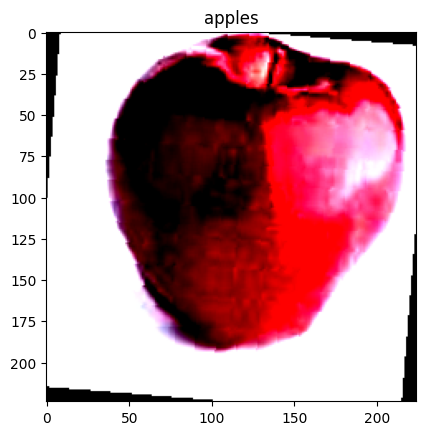

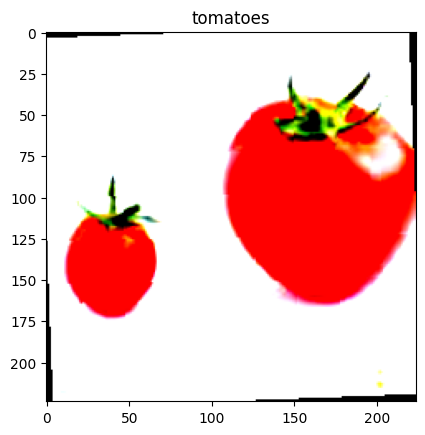

In [3]:
#function to display images
def imshow(img, title):
    img = img.numpy().transpose((1, 2, 0))  #convert to HWC (height, width, channels)
    plt.imshow(img)
    plt.title(title)
    plt.show()

#display images from each class
def display_images(dataset, class_names, num_images=1):
    for class_name in class_names:
        class_index = dataset.class_to_idx[class_name]
        count = 0
        for img, label in dataset:
            if label == class_index:
                imshow(img, f'{class_name}')
                count += 1
                if count == num_images:
                    break

#define class names (labels)
class_names = train_dataset.classes  

print("Training Set:")
display_images(train_dataset, class_names)

#print("Testing Set:")
#display_images(test_dataset, class_names)

In [4]:
model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V1)

for name,param in model.named_parameters():
    if "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 142MB/s]


In [5]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in (tqdm(train_loader)):
        inputs, labels = inputs.to(device), labels.to(device)

        
        optimizer.zero_grad() #gradients->zero

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        
        loss.backward() #backward pass and optimization
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}"),

100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


Epoch [1/10], Loss: 1.6819


100%|██████████| 10/10 [00:02<00:00,  3.46it/s]


Epoch [2/10], Loss: 0.5917


100%|██████████| 10/10 [00:02<00:00,  3.57it/s]


Epoch [3/10], Loss: 0.4857


100%|██████████| 10/10 [00:02<00:00,  3.60it/s]


Epoch [4/10], Loss: 0.7427


100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


Epoch [5/10], Loss: 0.5945


100%|██████████| 10/10 [00:02<00:00,  3.59it/s]


Epoch [6/10], Loss: 0.7588


100%|██████████| 10/10 [00:02<00:00,  3.44it/s]


Epoch [7/10], Loss: 0.5451


100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


Epoch [8/10], Loss: 0.3916


100%|██████████| 10/10 [00:02<00:00,  3.56it/s]


Epoch [9/10], Loss: 0.1741


100%|██████████| 10/10 [00:02<00:00,  3.69it/s]

Epoch [10/10], Loss: 0.2969


In [6]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in (tqdm(train_loader)):
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"train Accuracy: {100 * correct / total:.2f}%")

100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

train Accuracy: 95.92%


In [7]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)  #update total and correct counts
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

Test Accuracy: 92.78%


In [8]:
torch.save(model.state_dict(),'img_classification.pth')

In [9]:
from PIL import Image

model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features,1000)
model.load_state_dict(torch.load('img_classification.pth'))
model.eval()

new_model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V1)
new_model.fc = nn.Linear(new_model.fc.in_features,2)

new_model.fc.weight.data = model.fc.weight.data[0:2]
new_model.fc.bias.data = model.fc.bias.data[0:2]

In [10]:
image_path = '/kaggle/input/testing/apple.jpg'
image = Image.open(image_path)

input_tensor = transform(image)
input_batch = input_tensor.unsqueeze(0)

In [11]:
with torch.no_grad():
    output = model(input_batch)
i,predicted_class = output.max(1)

class_names = ['apples','tomatoes']

predicted_class_name = class_names[predicted_class.item()]

print(predicted_class_name)

apples


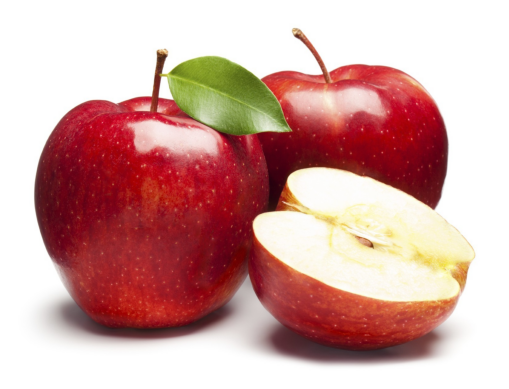

In [12]:
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.show()